# 第九次作业
### 姓名：张家琪
### 班级：2020211601
### 学号：2020211178

# 作业内容

## （1）利用教材给定的图像运动模糊退化模型对附件的图像进行处理，得到运动模糊图像，改变a,b的数值和符号，观察模糊的方向和程度

### 实现图像退化模型的源代码

运动模糊退化模型为：
$$
H(u,v)=\frac{T}{\pi(ua+vb)}sin[\pi(ua+vb)]e^{-j\pi(ua+vb)}
$$
其涵义为图像沿$x$轴以速度$x_0(t)=at/T$的速度运动，沿$y$轴以速度$y_0(t)=bt/T$的速度运动。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.util import random_noise
import math

(-0.5, 687.5, 687.5, -0.5)

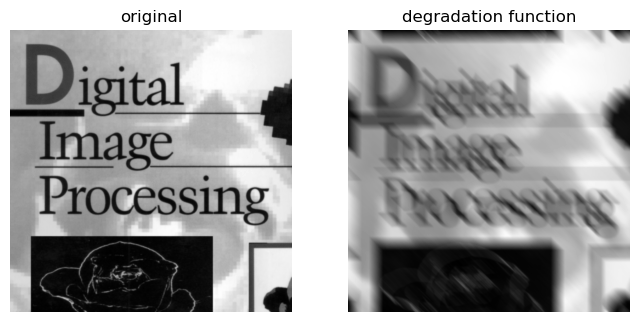

In [2]:
# 导入图片
img=io.imread("original_DIP.jpg",as_gray=True)

# 定义运动模糊函数
def H(T,a,b,u,v):
    C=math.pi*(u*a+v*b)
    if(C == 0):
        return 1
    return (T/C)*math.sin(C)*math.e**(-1j*C)

# 傅里叶变换
img_dft=np.fft.fftshift(np.fft.fft2(img))

# 频域滤波
def applyFilter(img,T,a,b):
    img_f=np.copy(img)
    for u in range(0,img.shape[0]):
        for v in range(0,img.shape[1]):
            img_f[u,v]=H(T,a,b,u-(img.shape[0]/2),v-(img.shape[1]/2))
    return img_f*img

# 傅里叶反变换
img_final=np.real(np.fft.ifft2(np.fft.ifftshift(applyFilter(img_dft,1,0.05,0.05))))

# 绘制图像
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(img,plt.cm.gray)
plt.title('original')
plt.axis('off')

plt.subplot(122)      
plt.imshow(img_final,plt.cm.gray)
plt.title('degradation function')
plt.axis('off')

### 分析a=0.1或-0.1,b=0.1或-0.1四种参数组合对模糊方向的影响 

(-0.5, 687.5, 687.5, -0.5)

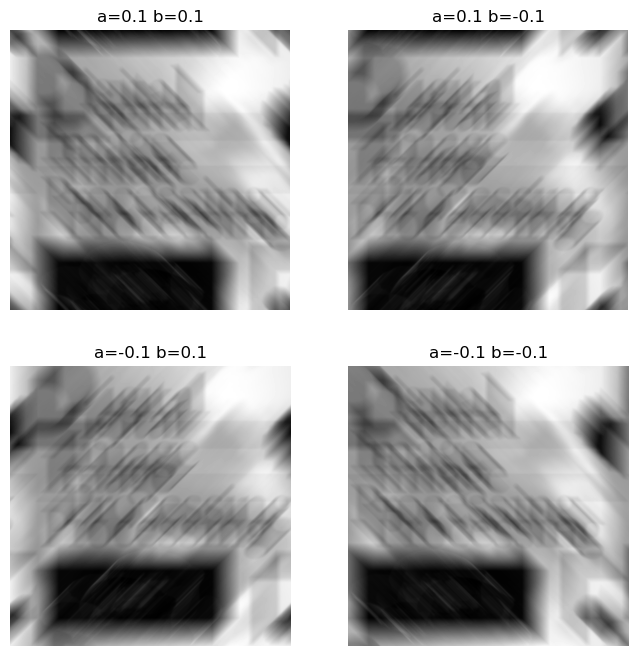

In [3]:
plt.figure(figsize=(8,8))

# a=0.1,b=0.1
plt.subplot(221)
img_dft_1=np.fft.fftshift(np.fft.fft2(img))
img_1=np.real(np.fft.ifft2(np.fft.ifftshift(applyFilter(img_dft_1,1,0.1,0.1))))
plt.imshow(img_1,plt.cm.gray)
plt.title('a=0.1 b=0.1')
plt.axis('off')

# a=0.1,b=-0.1
plt.subplot(222)
img_dft_2=np.fft.fftshift(np.fft.fft2(img))
img_2=np.real(np.fft.ifft2(np.fft.ifftshift(applyFilter(img_dft_2,1,0.1,-0.1))))
plt.imshow(img_2,plt.cm.gray)
plt.title('a=0.1 b=-0.1')
plt.axis('off')

# a=-0.1,b=0.1
plt.subplot(223)
img_dft_3=np.fft.fftshift(np.fft.fft2(img))
img_3=np.real(np.fft.ifft2(np.fft.ifftshift(applyFilter(img_dft_3,1,-0.1,0.1))))
plt.imshow(img_3,plt.cm.gray)
plt.title('a=-0.1 b=0.1')
plt.axis('off')

# a=-0.1,b=-0.1
plt.subplot(224)
img_dft_4=np.fft.fftshift(np.fft.fft2(img))
img_4=np.real(np.fft.ifft2(np.fft.ifftshift(applyFilter(img_dft_4,1,-0.1,-0.1))))
plt.imshow(img_4,plt.cm.gray)
plt.title('a=-0.1 b=-0.1')
plt.axis('off')

如上图所示，以左上角为原点，当$a=0.1,b=0.1$时，图像沿$(1,1)$方向运动；当$a=-0.1,b=0.1$时，图像沿$(-1,1)$方向运动，其他运动方向以此类推。

## （2）给运动模糊图像加入均值为零，方差为0.01的高斯噪声，观察加入噪声的图像

(-0.5, 277.5, 278.5, -0.5)

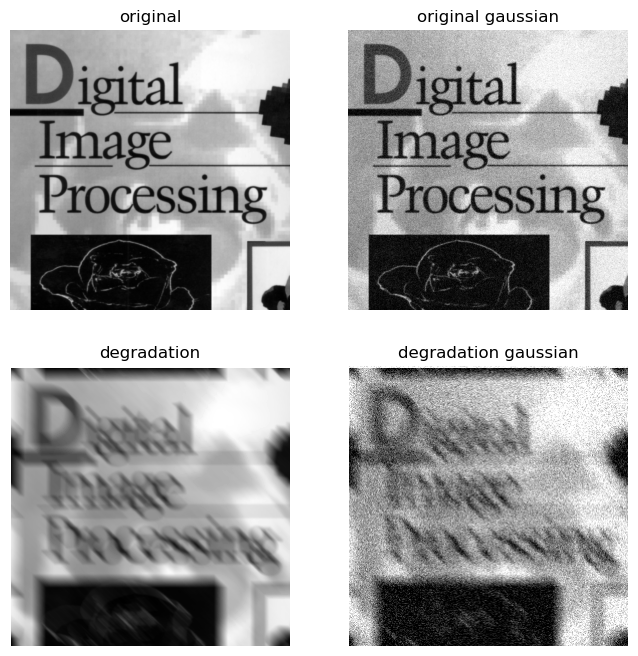

In [4]:
plt.figure(figsize=(8,8))

# 原图
plt.subplot(221)
plt.imshow(img,plt.cm.gray)
plt.title('original')
plt.axis('off')

# 原图加入高斯模糊
img_n=random_noise(img,'gaussian',mean=0,var=0.01) # 均值为0，方差为0.01
plt.subplot(222)
plt.imshow(img_n,plt.cm.gray)
plt.title('original gaussian')
plt.axis('off')

img_final_2=io.imread("output_11_1.png",as_gray=True)
# 运动模糊图像
plt.subplot(223)
plt.imshow(img_final_2,plt.cm.gray)
plt.title('degradation')
plt.axis('off')

# 运动模糊图像加入高斯模糊
img_d_n=random_noise(img_final_2,'gaussian',mean=0,var=0.01)
plt.subplot(224)
plt.imshow(img_d_n,plt.cm.gray)
plt.title('degradation gaussian')
plt.axis('off')